In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# Load the Iris dataset from Google Drive
df= pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)#DBSCAN Clustering Initialization and Fitting
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [ ]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,count
Cluster,
0,112
2,34
3,24
-1,18
1,8
4,4


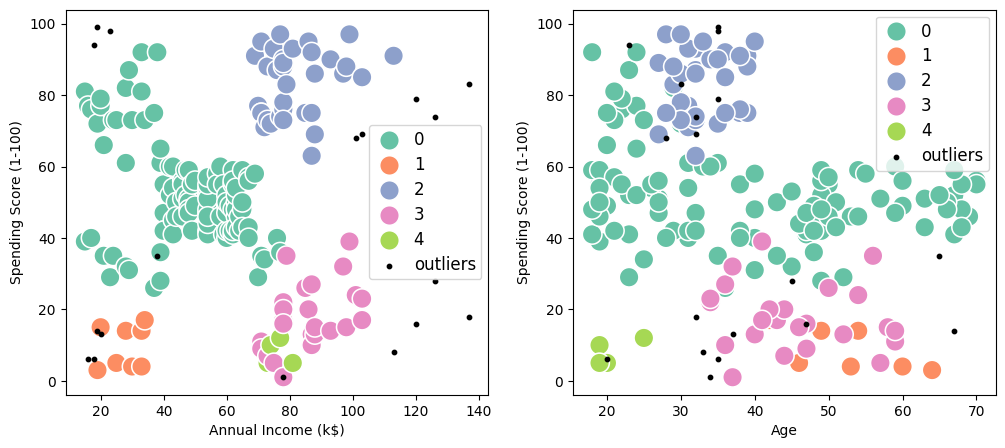

In [ ]:
# Identify outliers
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]

# Create subplots for visualization
fig2, (axes) = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot -- income & spending score relation show with dbscan datapoints
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

# Second scatter plot
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

# Plot outliers on the first subplot
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

# Plot outliers on the second subplot
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

# Add legends
axes[0].legend()
axes[1].legend()

# Adjust legend font size
plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

# Show plot
plt.show()